In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg


img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
validation_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_last':
    input_shape = (img_width, img_height,3)
else:
    input_shape = (3, img_width, img_height)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=input_shape))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3 , activation='softmax'))


loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('sec.h5')



print(model.summary())
model.save('Covid_Phenomena_4.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/20
47/47 [==============================] - 50s 1s/step - loss: 1.1270 - accuracy: 0.3256 - val_loss: 1.1000 - val_accuracy: 0.3125
Epoch 2/20
47/47 [==============================] - 56s 1s/step - loss: 1.3026 - accuracy: 0.3446 - val_loss: 0.9507 - val_accuracy: 0.5365
Epoch 3/20
47/47 [==============================] - 53s 1s/step - loss: 1.0292 - accuracy: 0.4858 - val_loss: 0.6548 - val_accuracy: 0.6406
Epoch 4/20
47/47 [==============================] - 53s 1s/step - loss: 0.8824 - accuracy: 0.5821 - val_loss: 0.8089 - val_accuracy: 0.7604
Epoch 5/20
47/47 [==============================] - 53s 1s/step - loss: 0.7412 - accuracy: 0.7001 - val_loss: 0.5092 - val_accuracy: 0.7656
Epoch 6/20
47/47 [==============================] - 53s 1s/step - loss: 0.6383 - accuracy: 0.7517 - val_loss: 0.4764 - val_accuracy: 0.8385
Epoch 7/20
47/47 [==============================] - 54s 1s/step - loss: 0.4638

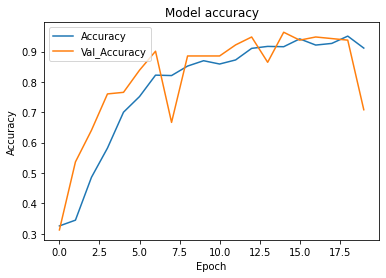

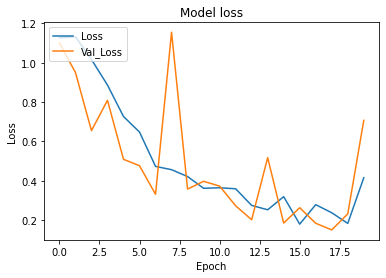

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()